In [22]:
import stlearn as st

In [97]:
data = st.read.file_table(filename="/home/d.pham/UQ/ST/Working/TBI_analysis/human_heart_counts_16.tsv")
data = st.add.parsing(data,coordinates_file = "/home/d.pham/Heart/spot_data-all-ST_Sample_9PCW_3.tsv")
st.add.image(adata=data, imgpath="/home/d.pham/Heart/ST_Sample_9PCW_3_HE_small.jpg")

Added tissue image to the object!


In [98]:
st.pp.filter_genes(data,min_cells=3)
st.pp.normalize_total(data)
st.pp.log1p(data)
st.pp.scale(data)
st.em.run_pca(data,n_comps=50)
st.pp.neighbors(data,n_neighbors=15)
st.em.run_umap(data)



filtered out 1442 genes that are detected in less than 3 cells
normalizing counts per cell
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X
PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']
Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 
UMAP is done! Generated in adata.obsm['X_umap'] nad adata.uns['umap']


In [99]:
st.spatial.smooth.disk(data,rates=2,method="median",use_data="X_pca",radius=225)

Disk smoothing function is applied! The new data are stored in adata.obsm["X_diffmap_disk"]


In [100]:
st.pp.neighbors(data,n_neighbors=5,use_rep='X_pca_disk')
st.tl.clustering.louvain(data)

Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 
Applying Louvain clustering ...
Louvain clustering is done! The labels are stored in adata.obs['louvain']


In [101]:
%matplotlib inline

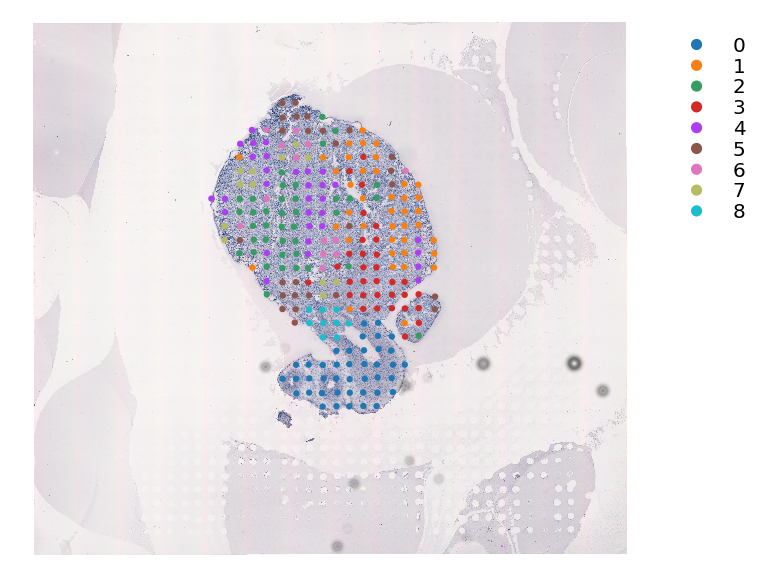

In [102]:
st.pl.cluster_plot(data,use_label="louvain")

Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 
Applying Louvain clustering ...
Louvain clustering is done! The labels are stored in adata.obs['louvain']


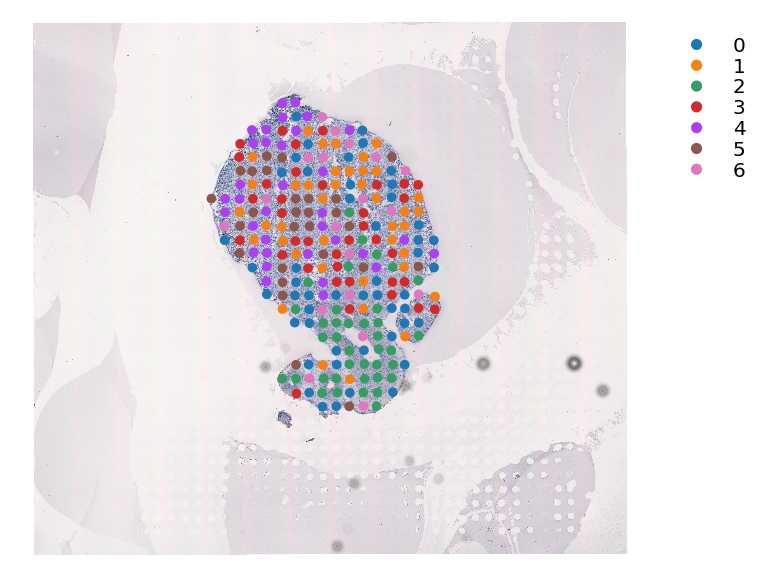

In [109]:
st.pp.neighbors(data,n_neighbors=15,use_rep='X_umap')
st.tl.clustering.louvain(data)
st.pl.cluster_plot(data,use_label="louvain",spot_size=15)

Applying Kmeans clustering ...
Kmeans clustering is done! The labels are stored in adata.obs["kmeans"]


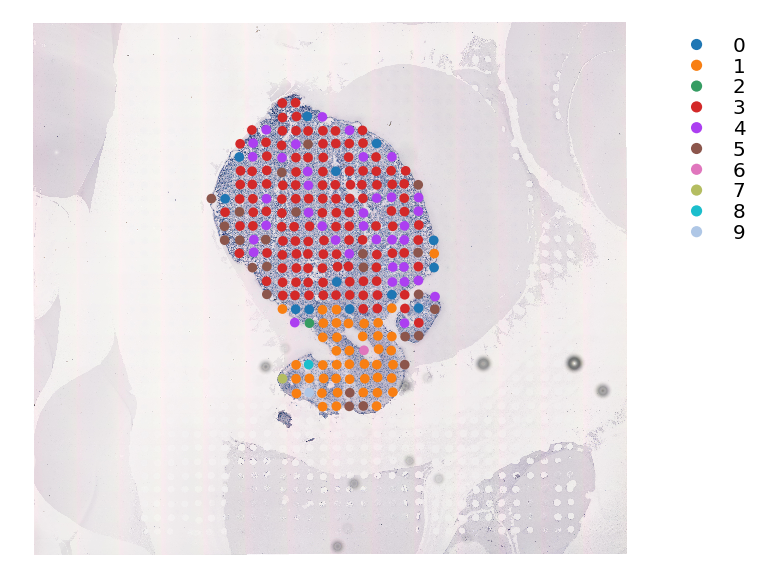

In [122]:

st.tl.clustering.kmeans(data,n_clusters=10,use_data="X_pca")
st.pl.cluster_plot(data,use_label="kmeans",spot_size=15)

Applying Kmeans clustering ...
Kmeans clustering is done! The labels are stored in adata.obs["kmeans"]


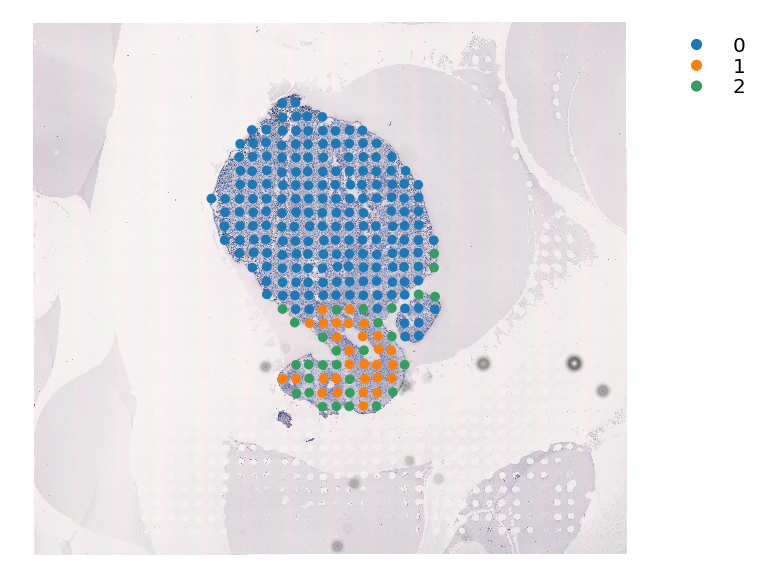

In [117]:

st.tl.clustering.kmeans(data,n_clusters=3,use_data="X_pca")
st.pl.cluster_plot(data,use_label="kmeans",spot_size=15)

In [95]:
st.spatial.trajectory.global_level(data,pseudo_root=3,eps=500)

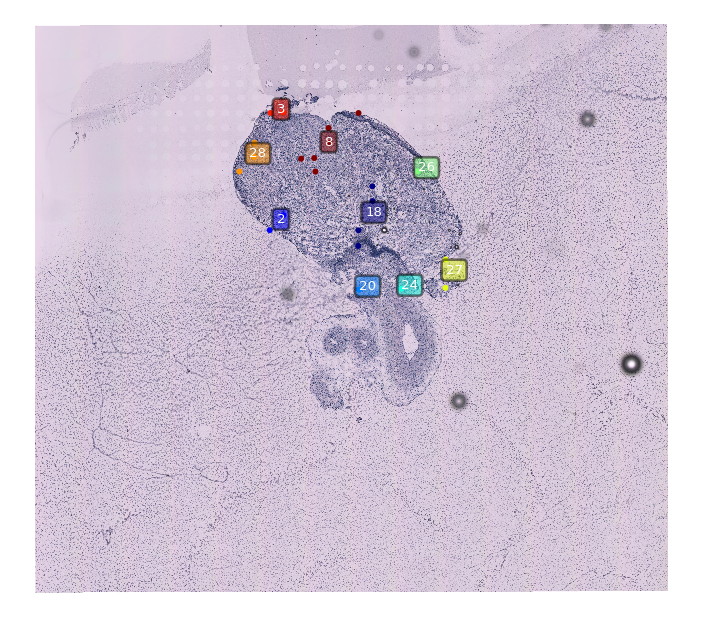

In [96]:
st.pl.subcluster_plot(data,use_label="louvain",cluster=4)

PAGA plot:


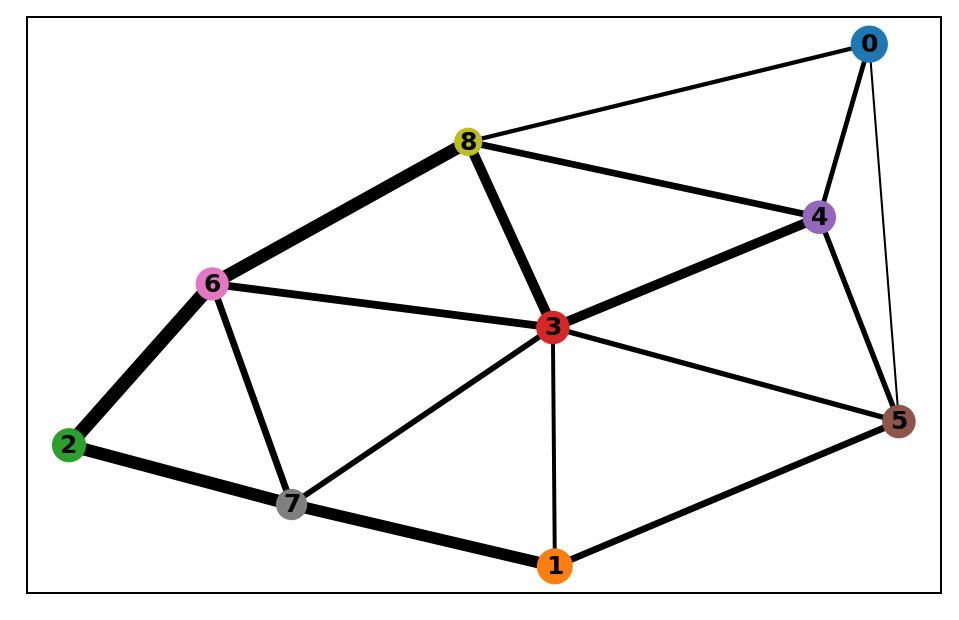

Gene expression (reduced dimension) plot:


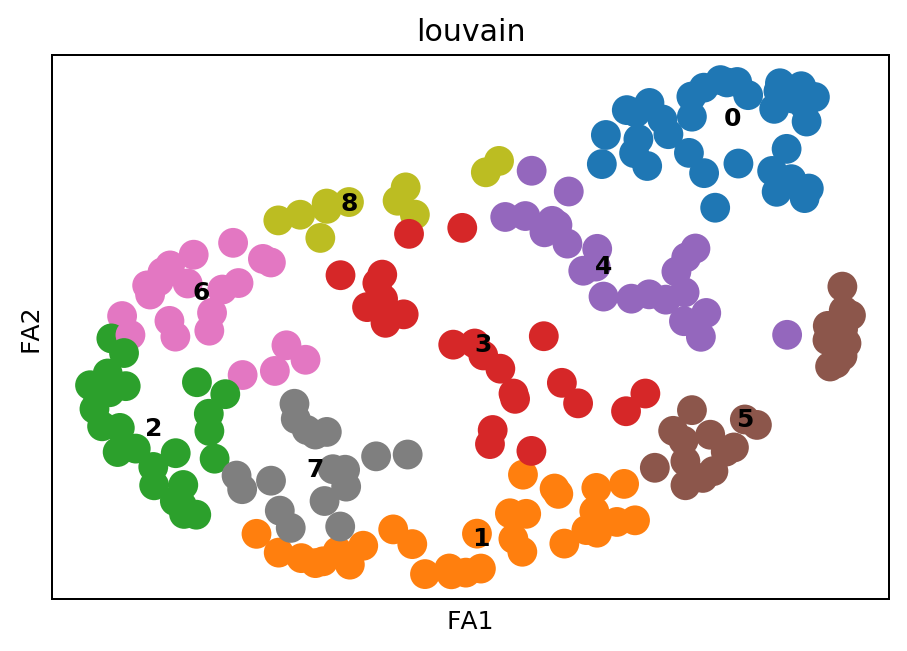

Diffusion pseudotime plot:


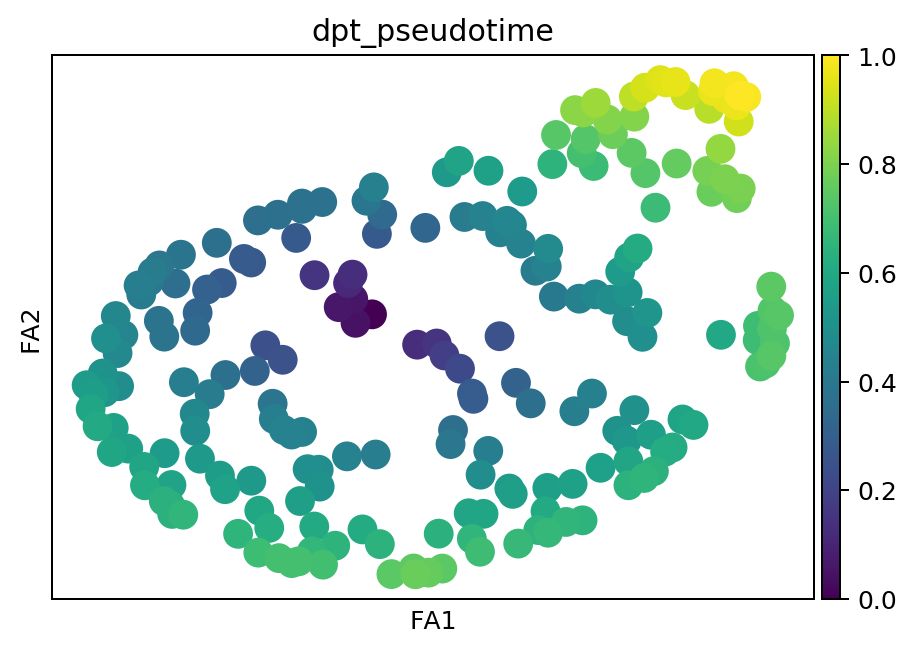

In [10]:
st.pl.non_spatial_plot(data)

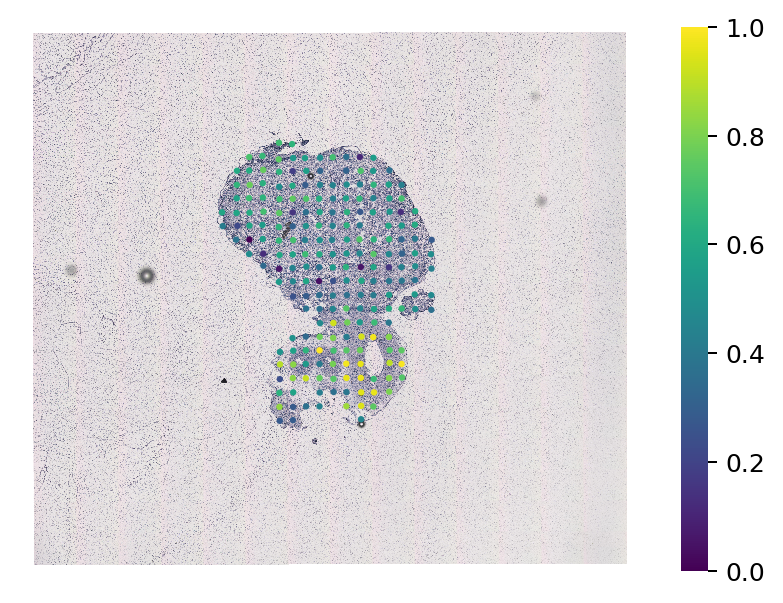

In [11]:
st.pl.trajectory.global_plot(data,list_cluster="all",show_graph=False)

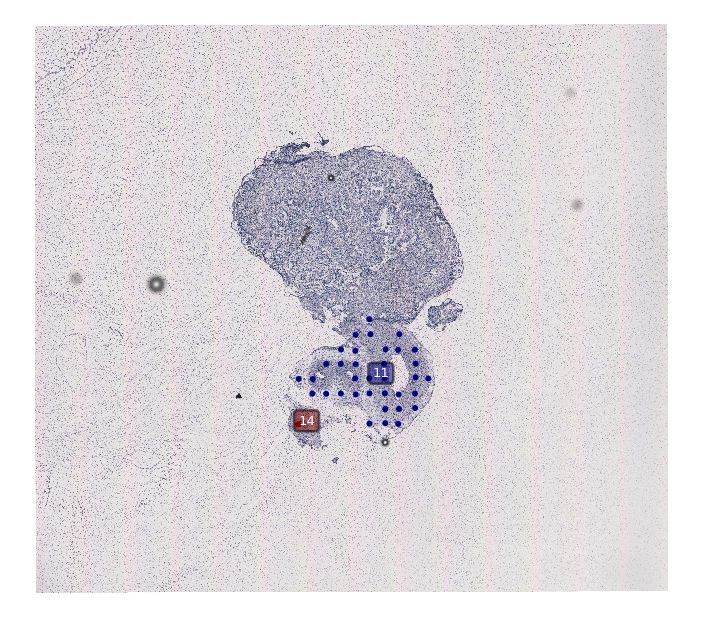

In [12]:
st.pl.subcluster_plot(data,use_label="louvain",cluster=0)

In [19]:
st.spatial.trajectory.sublocal_level(data,subcluster="all",n_neighbors=10)

Start construct trajectory for subcluster all
Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 
Applying Louvain clustering ...
Louvain clustering is done! The labels are stored in adata.obs['louvain']


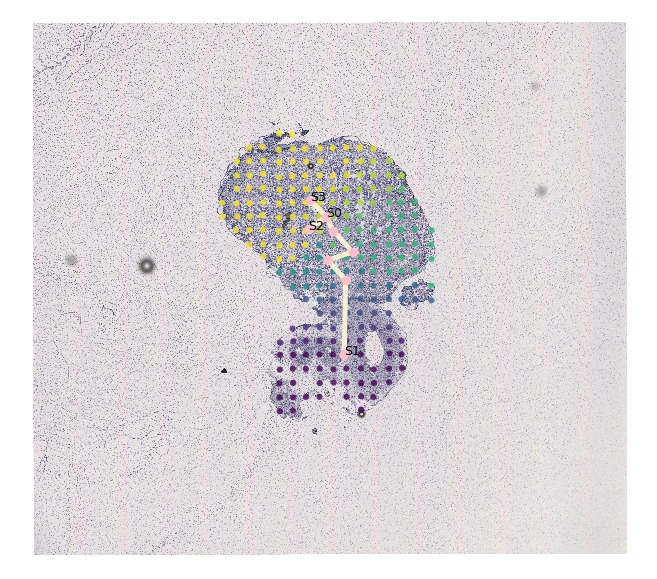

In [20]:
st.pl.trajectory.sublocal_plot(data,subcluster="all",cmap="viridis",route="S1",show_root=True)

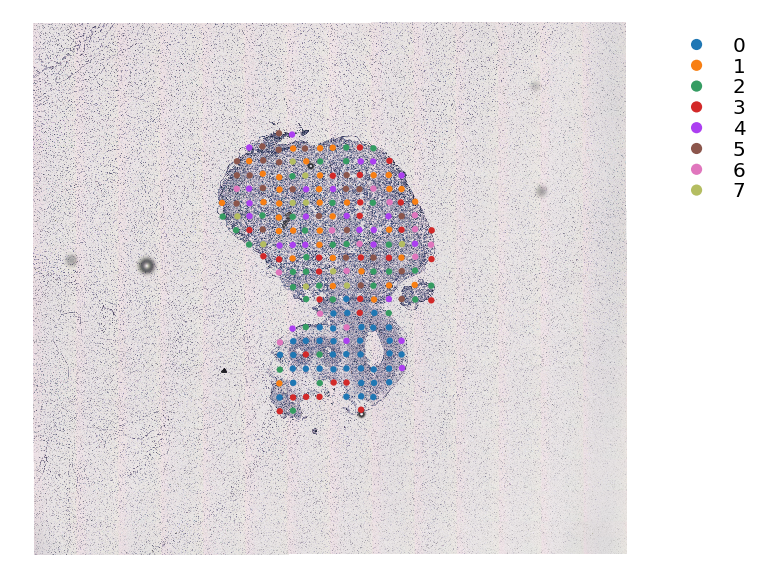

In [21]:
st.pl.cluster_plot(data.uns["subcluster_all_adata"],use_label="louvain")

In [15]:
data

AnnData object with n_obs × n_vars = 211 × 11377 
    obs: 'imagecol', 'imagerow', 'sum_counts', 'louvain', 'sub_cluster_labels', 'dpt_pseudotime'
    var: 'n_cells'
    uns: 'tissue_img', 'log1p', 'pca', 'neighbors', 'umap', 'louvain', 'paga', 'louvain_sizes', 'split_node', 'global_graph', 'centroid_dict', 'iroot', 'diffmap_evals', 'louvain_colors', 'draw_graph', 'subcluster_all_pts', 'subcluster_all_adata'
    obsm: 'filtered_counts', 'X_pca', 'X_umap', 'X_umap_disk', 'X_diffmap', 'X_draw_graph_fa'
    varm: 'PCs'

In [25]:
data.uns["subcluster_all_adata"].obs.sub_cluster_labels

3655.5x2709.2     0
3663.4x2939.8     1
3662.5x3144.1     1
3661.2x3365.0     2
3656.0x3593.6     3
                 ..
3458.1x2944.1     6
3471.9x3147.7     6
3450.6x3366.4    11
3465.5x2276.1     1
3461.8x2499.2     4
Name: sub_cluster_labels, Length: 211, dtype: category
Categories (13, object): [0, 1, 2, 3, ..., 9, 10, 11, 12]

In [16]:
if type(subcluster) == list:
    query = ''
    for i in subcluster:
         query = " | ".join([query,'sub_cluster_labels == "' + str(i) + '"'])

    tmp = data.obs.query(query[3:])
else:
    tmp = data.obs[adata.obs["sub_cluster_labels"]==str(subcluster)]

subcluster_data = data[list(tmp.index)]


NameError: name 'subcluster' is not defined